### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### application_train , application_test
#### We are reading the feature matrix (the dataframe with the information from all the datasets)

In [4]:
app = pd.read_csv(r"C:\Users\HP\Documents\FDS\FDS Project\featurematrix.csv")

#### We are seperating the train and test data, since we appended one on top of the other to do the feature merge

In [5]:
train = app[app["set"] == "train"]

In [6]:
test = app[app["set"] == "test"]

In [7]:
import gc
del app
gc.collect()

67

#### First we notice that the maximum value of children is 19, which in my opinion is kind of extreme. For some object column hist is not possible because of the null values. However we have the description of the column which guide us a bit.  Additionally, we notice a weird torn in the days of employment. While the days should be a negative number we have observations that are positive, and actually a high number. We observed also that in the column own_car_age we have that the maximum age that a client has is 91 years. I don't know if this is a mistage or it is something like a vintage car.  Another possible mistage is on the columns obs. We will check it later if there is only one observation with this maximum value or there are more clients that have this. 

### CNT_CHILDREN

{'whiskers': [<matplotlib.lines.Line2D at 0x226bedfa9c8>,
 'caps': [<matplotlib.lines.Line2D at 0x226bee1f548>,
 'boxes': [<matplotlib.lines.Line2D at 0x226beddfa88>],
 'medians': [<matplotlib.lines.Line2D at 0x226bee54b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x226bee66e08>],
 'means': []}

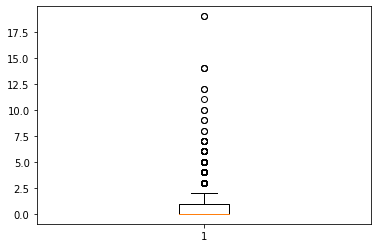

In [8]:
plt.boxplot(train["CNT_CHILDREN"])

In [7]:
train[train["CNT_CHILDREN"] == 19]

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MEAN(credit.previous.DAYS_FIRST_DUE),MEAN(credit.previous.NFLAG_LAST_APPL_IN_DAY),MEAN(credit.previous.AMT_CREDIT),MEAN(credit.previous.AMT_GOODS_PRICE),MEAN(credit.previous.HOUR_APPR_PROCESS_START),MEAN(credit.previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL),MEAN(credit.previous.AMT_ANNUITY),MEAN(credit.previous.AMT_DOWN_PAYMENT),MEAN(credit.previous.RATE_INTEREST_PRIMARY)
155369,280108,13891.5,269550.0,225000.0,112500.0,0.0,0.0,0.0,0.0,0.0,...,-703.0,1.0,112500.0,NaN,16.0,NaN,0.0,5625.0,NaN,NaN
265784,407877,8788.5,135000.0,135000.0,112500.0,0.0,0.0,0.0,0.0,0.0,...,365243.0,1.0,45000.0,45000.0,15.0,NaN,0.0,2250.0,NaN,NaN


In [8]:
test[test["CNT_CHILDREN"] == 20]

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MEAN(credit.previous.DAYS_FIRST_DUE),MEAN(credit.previous.NFLAG_LAST_APPL_IN_DAY),MEAN(credit.previous.AMT_CREDIT),MEAN(credit.previous.AMT_GOODS_PRICE),MEAN(credit.previous.HOUR_APPR_PROCESS_START),MEAN(credit.previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL),MEAN(credit.previous.AMT_ANNUITY),MEAN(credit.previous.AMT_DOWN_PAYMENT),MEAN(credit.previous.RATE_INTEREST_PRIMARY)
325150,227945,40473.0,339948.0,315000.0,287100.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### It look like it's the same person, with 19 children and an income at 112500. However this doens't raise any concern for now. So we keep it like that 
### DAYS_EMPLOYED

{'whiskers': [<matplotlib.lines.Line2D at 0x1c4c18a3b88>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4c0f6d788>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4c0f38e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4c0f9ae88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4c0fad308>],
 'means': []}

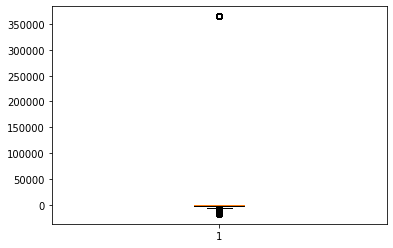

In [9]:
plt.boxplot(train["DAYS_EMPLOYED"])

In [10]:
train[train["DAYS_EMPLOYED"] == 365243 ]

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MEAN(credit.previous.DAYS_FIRST_DUE),MEAN(credit.previous.NFLAG_LAST_APPL_IN_DAY),MEAN(credit.previous.AMT_CREDIT),MEAN(credit.previous.AMT_GOODS_PRICE),MEAN(credit.previous.HOUR_APPR_PROCESS_START),MEAN(credit.previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL),MEAN(credit.previous.AMT_ANNUITY),MEAN(credit.previous.AMT_DOWN_PAYMENT),MEAN(credit.previous.RATE_INTEREST_PRIMARY)
8,100011,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,0.0,...,-2229.0,1.0,180000.0,NaN,10.0,NaN,0.0,9000.0,NaN,NaN
11,100015,10678.5,148365.0,135000.0,38419.155,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,100027,23850.0,239850.0,225000.0,83250.000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,100045,17338.5,247275.0,225000.0,99000.000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,100050,42970.5,746280.0,675000.0,108000.000,0.0,0.0,0.0,0.0,0.0,...,365243.0,1.0,180000.0,180000.0,9.0,NaN,0.0,9000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,29943.0,703728.0,607500.0,202500.000,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307483,456227,16479.0,247275.0,225000.0,99000.000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307487,456231,31473.0,1071909.0,936000.0,117000.000,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307505,456249,22050.0,225000.0,225000.0,112500.000,0.0,0.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Here we see that the amount of clients that have 365243 as their days of employement is 55374, which is a high number. However, the minimum value of days of employments is -17912 ( which is approximately 49 years). Even if we substutute 365243 with -365243 we have a person that worked 1000 years (impossible) . So it is for sure a mistake. 

In [9]:
train["DAYS_EMPLOYED"].replace(365243, np.nan, inplace = True)
test["DAYS_EMPLOYED"].replace(365243, np.nan, inplace = True)

### OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE

In [12]:
train[train["OBS_30_CNT_SOCIAL_CIRCLE"] == 348 ]

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MEAN(credit.previous.DAYS_FIRST_DUE),MEAN(credit.previous.NFLAG_LAST_APPL_IN_DAY),MEAN(credit.previous.AMT_CREDIT),MEAN(credit.previous.AMT_GOODS_PRICE),MEAN(credit.previous.HOUR_APPR_PROCESS_START),MEAN(credit.previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL),MEAN(credit.previous.AMT_ANNUITY),MEAN(credit.previous.AMT_DOWN_PAYMENT),MEAN(credit.previous.RATE_INTEREST_PRIMARY)
148403,272071,9000.0,180000.0,180000.0,202500.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test[test["OBS_30_CNT_SOCIAL_CIRCLE"] == 354 ]

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MEAN(credit.previous.DAYS_FIRST_DUE),MEAN(credit.previous.NFLAG_LAST_APPL_IN_DAY),MEAN(credit.previous.AMT_CREDIT),MEAN(credit.previous.AMT_GOODS_PRICE),MEAN(credit.previous.HOUR_APPR_PROCESS_START),MEAN(credit.previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL),MEAN(credit.previous.AMT_ANNUITY),MEAN(credit.previous.AMT_DOWN_PAYMENT),MEAN(credit.previous.RATE_INTEREST_PRIMARY)
346380,386282,25389.0,573408.0,495000.0,135000.0,0.0,0.0,0.0,1.0,0.0,...,-98.0,1.0,450000.0,450000.0,7.0,NaN,0.0,22500.0,NaN,NaN


In [14]:
train["OBS_30_CNT_SOCIAL_CIRCLE"].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

In [15]:
test["OBS_30_CNT_SOCIAL_CIRCLE"].unique()

array([  0.,   1.,   4.,   5.,   2.,   7.,  10.,   6.,   3.,  17.,   9.,
        12.,  14.,   8.,  18.,  23.,  11.,  13.,  15.,  nan,  16.,  20.,
        19.,  29.,  21.,  22., 353., 354., 352.])

In [16]:
train[train["DEF_30_CNT_SOCIAL_CIRCLE"] == 34 ]

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MEAN(credit.previous.DAYS_FIRST_DUE),MEAN(credit.previous.NFLAG_LAST_APPL_IN_DAY),MEAN(credit.previous.AMT_CREDIT),MEAN(credit.previous.AMT_GOODS_PRICE),MEAN(credit.previous.HOUR_APPR_PROCESS_START),MEAN(credit.previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL),MEAN(credit.previous.AMT_ANNUITY),MEAN(credit.previous.AMT_DOWN_PAYMENT),MEAN(credit.previous.RATE_INTEREST_PRIMARY)
148403,272071,9000.0,180000.0,180000.0,202500.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train["DEF_30_CNT_SOCIAL_CIRCLE"].unique()

array([ 2.,  0.,  1., nan,  3.,  4.,  5.,  6.,  7., 34.,  8.])

In [18]:
train[train["OBS_60_CNT_SOCIAL_CIRCLE"] == 344 ]

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MEAN(credit.previous.DAYS_FIRST_DUE),MEAN(credit.previous.NFLAG_LAST_APPL_IN_DAY),MEAN(credit.previous.AMT_CREDIT),MEAN(credit.previous.AMT_GOODS_PRICE),MEAN(credit.previous.HOUR_APPR_PROCESS_START),MEAN(credit.previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL),MEAN(credit.previous.AMT_ANNUITY),MEAN(credit.previous.AMT_DOWN_PAYMENT),MEAN(credit.previous.RATE_INTEREST_PRIMARY)
148403,272071,9000.0,180000.0,180000.0,202500.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
train["DEF_60_CNT_SOCIAL_CIRCLE"].unique()

array([ 2.,  0.,  1., nan,  3.,  5.,  4.,  7., 24.,  6.])

In [20]:
train[train["DEF_60_CNT_SOCIAL_CIRCLE"] == 24 ]

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MEAN(credit.previous.DAYS_FIRST_DUE),MEAN(credit.previous.NFLAG_LAST_APPL_IN_DAY),MEAN(credit.previous.AMT_CREDIT),MEAN(credit.previous.AMT_GOODS_PRICE),MEAN(credit.previous.HOUR_APPR_PROCESS_START),MEAN(credit.previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL),MEAN(credit.previous.AMT_ANNUITY),MEAN(credit.previous.AMT_DOWN_PAYMENT),MEAN(credit.previous.RATE_INTEREST_PRIMARY)
148403,272071,9000.0,180000.0,180000.0,202500.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
train["DEF_60_CNT_SOCIAL_CIRCLE"].unique()

array([ 2.,  0.,  1., nan,  3.,  5.,  4.,  7., 24.,  6.])

#### It is quite obvious that the client with id 272071 has some invalid entries in this columns. However if we test the test data we can see that there are other clients with higher or similar entries. So, because it might now be a mistake at it might be something meaningfull we will keep it like that

### AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY ....

In [22]:
train[train["AMT_REQ_CREDIT_BUREAU_HOUR"] == 4 ]

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MEAN(credit.previous.DAYS_FIRST_DUE),MEAN(credit.previous.NFLAG_LAST_APPL_IN_DAY),MEAN(credit.previous.AMT_CREDIT),MEAN(credit.previous.AMT_GOODS_PRICE),MEAN(credit.previous.HOUR_APPR_PROCESS_START),MEAN(credit.previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL),MEAN(credit.previous.AMT_ANNUITY),MEAN(credit.previous.AMT_DOWN_PAYMENT),MEAN(credit.previous.RATE_INTEREST_PRIMARY)
153915,278383,25402.5,495000.0,495000.0,247500.0,3.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
train["AMT_REQ_CREDIT_BUREAU_HOUR"].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [24]:
train[train["AMT_REQ_CREDIT_BUREAU_DAY"] == 9 ]

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MEAN(credit.previous.DAYS_FIRST_DUE),MEAN(credit.previous.NFLAG_LAST_APPL_IN_DAY),MEAN(credit.previous.AMT_CREDIT),MEAN(credit.previous.AMT_GOODS_PRICE),MEAN(credit.previous.HOUR_APPR_PROCESS_START),MEAN(credit.previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL),MEAN(credit.previous.AMT_ANNUITY),MEAN(credit.previous.AMT_DOWN_PAYMENT),MEAN(credit.previous.RATE_INTEREST_PRIMARY)
110127,227725,36328.5,755190.0,675000.0,270000.0,9.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126468,246671,25128.0,855000.0,855000.0,261000.0,9.0,0.0,0.0,2.0,8.0,...,-2516.0,1.0,135000.0,NaN,16.0,NaN,0.0,6750.0,NaN,NaN


In [25]:
train["AMT_REQ_CREDIT_BUREAU_DAY"].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

#### No malfunction here

## We will now check the amount of missing values in each column

In [26]:
percentage_more_0 = 100*train.isnull().sum()[train.isnull().sum()>0]/len(train)
percentage_more_47 = percentage_more_0[percentage_more_0 > 47].sort_values(ascending = False)
test_more_0 = 100*test.isnull().sum()[test.isnull().sum()>0]/len(test)
test_more_47 = percentage_more_0[percentage_more_0 > 47].sort_values(ascending = False)

In [27]:
set(percentage_more_47.index).difference(set(test_more_47.index))

set()

In [28]:
set(test_more_47.index).difference(set(percentage_more_47.index))

set()

### Checking the categorical columns

In [29]:
for col in train.columns:
    if col == "SK_ID_CURR" or col == "TARGET":
        continue
    elif "SK" in col:
        train.drop(columns = col)
    if train[col].dtype != object and 2< train[col].nunique() < 5:
        print(col)
    
    
for col in test.columns:
    if col == "SK_ID_CURR" or col == "TARGET":
        continue
    elif "SK" in col:
        test.drop(columns = col)
    if test[col].dtype != object and 2< test[col].nunique() < 5:
        print(col)
    

REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_WEEK
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL)


In [30]:
train["AMT_REQ_CREDIT_BUREAU_WEEK"].dtype

dtype('float64')

In [31]:
train["MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL)"].dtype

dtype('float64')

In [10]:
train["REGION_RATING_CLIENT"] = train["REGION_RATING_CLIENT"].astype('object')
train["REGION_RATING_CLIENT_W_CITY"] = train["REGION_RATING_CLIENT_W_CITY"].astype('object')
test["REGION_RATING_CLIENT"] = test["REGION_RATING_CLIENT"].astype('object')
test["REGION_RATING_CLIENT_W_CITY"] = test["REGION_RATING_CLIENT_W_CITY"].astype('object')

In [11]:
test["AMT_REQ_CREDIT_BUREAU_HOUR"] = test["AMT_REQ_CREDIT_BUREAU_HOUR"].astype('float64')
test["AMT_REQ_CREDIT_BUREAU_DAY"] = test["AMT_REQ_CREDIT_BUREAU_DAY"].astype('float64')
test["AMT_REQ_CREDIT_BUREAU_WEEK"] = test["AMT_REQ_CREDIT_BUREAU_WEEK"].astype('float64')
test["MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL)"] = test["MEAN(credit.previous.NFLAG_INSURED_ON_APPROVAL)"].astype('float64')

#### We will do one hot encoding for all the object columns

In [12]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [13]:
columns_in_train_not_in_test = set(train.columns).difference(set(test.columns))

In [14]:
for col in list(columns_in_train_not_in_test):
    if col == "TARGET":
        continue
    train.drop(columns = col, inplace = True)

In [15]:
set(train.columns).difference(set(test.columns))

set()

In [16]:
columns_in_test_not_in_train = set(test.columns).difference(set(train.columns))
test.drop(columns = columns_in_test_not_in_train, inplace = True)

In [17]:
set(test.columns).difference(set(train.columns))

set()

In [40]:
# fitting the model

In [18]:
#Split data into training features and labels
#X, y = train.loc[:, train.columns != 'TARGET'], train['TARGET']
#from sklearn.model_selection import train_test_split
# split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
#import XGBoost classifier and accuracy
#from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score
#instantiate model and train
#model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
#model.fit(X_train, y_train)
# make predictions for test set
#y_pred = model.predict(t)ra
#predictions =  y_pred
#from sklearn.metrics import roc_curve, roc_auc_score
#print(roc_auc_score(y_test, predictions))












In [26]:
target = train["TARGET"]
test.drop(columns = ["TARGET"], inplace = True)
train_df = train.drop(columns = ["TARGET"])

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
submission = pd.read_csv('sample_submission.csv')
train_x, valid_x, train_y, valid_y = train_test_split(train_df, target, test_size = 0.2, shuffle = True)
train_data = lgb.Dataset(train_x, label = train_y)
valid_data = lgb.Dataset(valid_x, label = valid_y)
train_df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in train_df.columns]
test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in test.columns]

# Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : 10,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }

lgbm = lgb.train(params,
                 train_data,
                 2500,
                 valid_sets = valid_data,
                 early_stopping_rounds = 100,
                 verbose_eval = 10
                 )

predictions_lgbm_prob = lgbm.predict(test)

submission.TARGET = predictions_lgbm_prob

submission.to_csv('submission.csv', index=False)

Training until validation scores don't improve for 100 rounds
[10]	valid_0's auc: 0.746001
[20]	valid_0's auc: 0.750114
[30]	valid_0's auc: 0.755613
[40]	valid_0's auc: 0.759758
[50]	valid_0's auc: 0.763951
[60]	valid_0's auc: 0.767867
[70]	valid_0's auc: 0.770798
[80]	valid_0's auc: 0.772801
[90]	valid_0's auc: 0.774379
[100]	valid_0's auc: 0.775967
[110]	valid_0's auc: 0.777045
[120]	valid_0's auc: 0.778136
[130]	valid_0's auc: 0.778717
[140]	valid_0's auc: 0.779475
[150]	valid_0's auc: 0.779855
[160]	valid_0's auc: 0.78035
[170]	valid_0's auc: 0.780737
[180]	valid_0's auc: 0.781182
[190]	valid_0's auc: 0.781322
[200]	valid_0's auc: 0.781601
[210]	valid_0's auc: 0.781997
[220]	valid_0's auc: 0.782056
[230]	valid_0's auc: 0.782252
[240]	valid_0's auc: 0.782398
[250]	valid_0's auc: 0.78256
[260]	valid_0's auc: 0.782521
[270]	valid_0's auc: 0.782541
[280]	valid_0's auc: 0.782657
[290]	valid_0's auc: 0.782593
[300]	valid_0's auc: 0.782588
[310]	valid_0's auc: 0.782615
[320]	valid_0's auc

In [34]:
y = target
X = train
#Split data into training features and labels
from sklearn.model_selection import train_test_split
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
#instantiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(X_train, y_train)
# make predictions for test set
y_pred = model.predict(X_test)
from sklearn.metrics import roc_curve, roc_auc_score
print(roc_auc_score(y_test, y_pred))


1.0
